In [1]:
import os
from zipfile import ZipFile

zip_file_path = 'C:/Users/User/Desktop/crop_disease_dataset.zip'
extracted_dir_path = 'C:/Users/User/Desktop/crop_disease_dataset/'

with ZipFile(zip_file_path,'r') as zipobj:
    zipobj.extractall(extracted_dir_path)

os.listdir(extracted_dir_path+str('New Plant Diseases Dataset(Augmented)/'))


['train', 'valid']

In [2]:
import torch
import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader


In [3]:
extracted_train_dir = 'C:/Users/User/Desktop/crop_disease_dataset/New Plant Diseases Dataset(Augmented)/train/'
extracted_val_dir = 'C:/Users/User/Desktop/crop_disease_dataset/New Plant Diseases Dataset(Augmented)/valid/'
transform_data = transforms.Compose([transforms.Resize((250,250)),transforms.ToTensor()])
train_data = ImageFolder(extracted_train_dir,transform=transform_data)
val_data = ImageFolder(extracted_val_dir,transform=transform_data)
train_dataloader = DataLoader(train_data, batch_size=20, shuffle=True)
val_dataloader = DataLoader(val_data,batch_size = 20, shuffle = True)

classes = train_data.classes
classidx = train_data.class_to_idx
samples = train_data.samples

# print(train_data[7000][0].size(),val_data[7000][0].size())
# print('classes:',train_data.classes,len(train_data.classes))
# print(train_data,val_data)

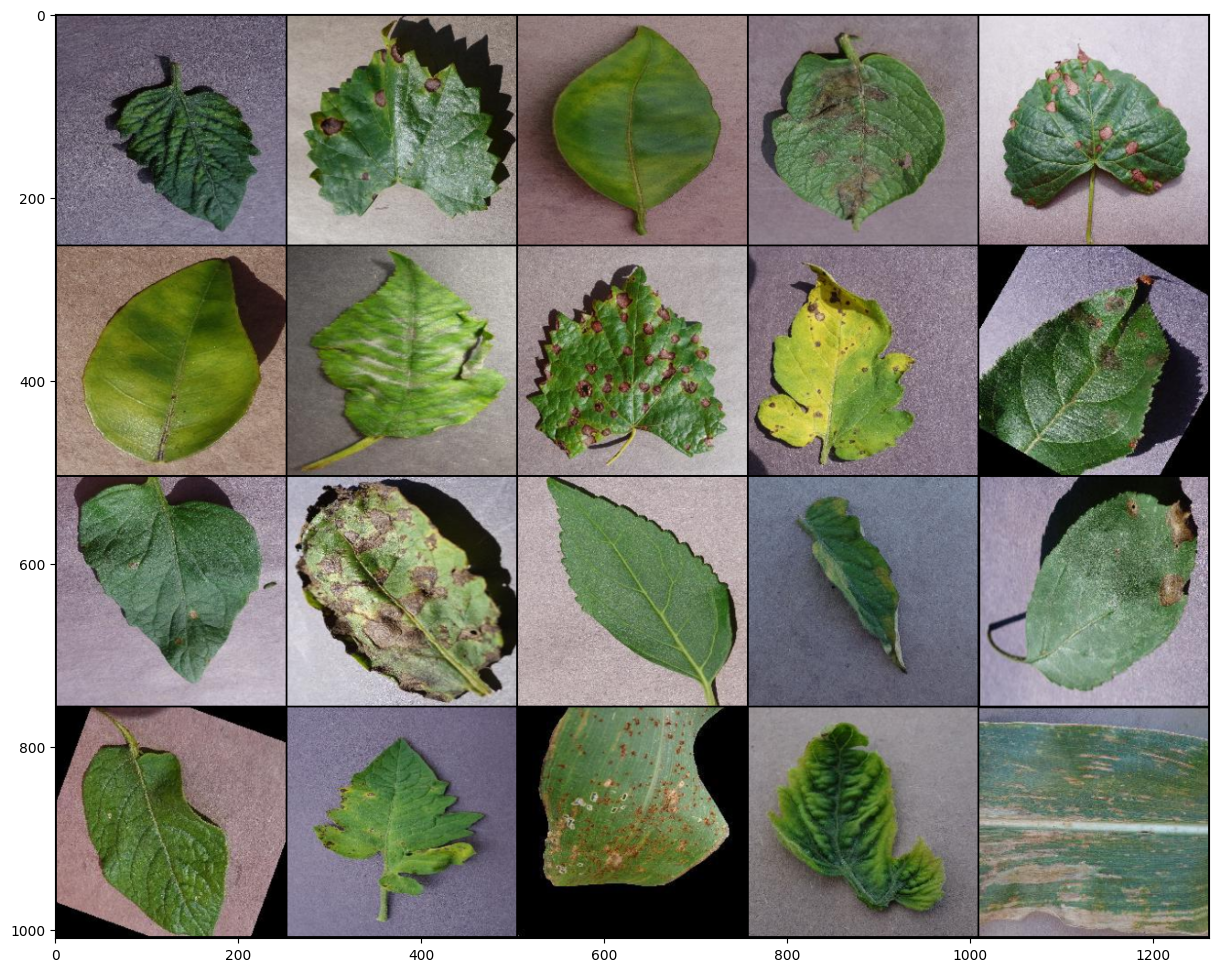

In [4]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(data):
    for images,labels in data:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.imshow(make_grid(images,nrow=5).permute(1,2,0))
        break
show_batch(train_dataloader)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3,stride=1),
    nn.ReLU(),
    nn.Conv2d(16,32,kernel_size=3,stride=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(32,64,kernel_size=3,stride=1),
    nn.ReLU(),
    nn.Conv2d(64,64,kernel_size=3,stride=1),
    nn.ReLU(),
    nn.MaxPool2d(4,4),

    nn.Flatten(),
    nn.Linear(29*29*64,512),
    nn.ReLU(),
    nn.Linear(512,38)
).to(device)

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 0:    
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.036
[1,   101] loss: 3.638
[1,   201] loss: 3.636
[1,   301] loss: 3.636
[1,   401] loss: 3.635
[1,   501] loss: 3.631
[1,   601] loss: 3.626
[1,   701] loss: 3.619
[1,   801] loss: 3.590
[1,   901] loss: 3.498
[1,  1001] loss: 3.213
[1,  1101] loss: 2.938
[1,  1201] loss: 2.690
[1,  1301] loss: 2.537
[1,  1401] loss: 2.450
[1,  1501] loss: 2.342
[1,  1601] loss: 2.160
[1,  1701] loss: 2.089
[1,  1801] loss: 1.968
[1,  1901] loss: 1.884
[1,  2001] loss: 1.668
[1,  2101] loss: 1.630
[1,  2201] loss: 1.619
[1,  2301] loss: 1.464
[1,  2401] loss: 1.384
[1,  2501] loss: 1.447
[1,  2601] loss: 1.365
[1,  2701] loss: 1.270
[1,  2801] loss: 1.227
[1,  2901] loss: 1.279
[1,  3001] loss: 1.179
[1,  3101] loss: 1.149
[1,  3201] loss: 1.120
[1,  3301] loss: 1.142
[1,  3401] loss: 1.012
[1,  3501] loss: 0.983
[2,     1] loss: 0.011
[2,   101] loss: 0.981
[2,   201] loss: 0.894
[2,   301] loss: 0.985
[2,   401] loss: 0.913
[2,   501] loss: 0.837
[2,   601] loss: 0.866
[2,   701] 

In [9]:
PATH = 'C:/Users/User/Desktop/vscode_jupyter/crop_disease_detection_model_1.pth'
torch.save(model.state_dict(), PATH)

In [10]:
model.load_state_dict(torch.load(PATH))

C:\Users\User\AppData\Local\Temp\ipykernel_31280\2932547067.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [11]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in val_dataloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 93 %


In [12]:
classes = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in val_dataloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Apple___Apple_scab is 92.3 %
Accuracy for class: Apple___Black_rot is 98.4 %
Accuracy for class: Apple___Cedar_apple_rust is 93.9 %
Accuracy for class: Apple___healthy is 87.1 %
Accuracy for class: Blueberry___healthy is 93.2 %
Accuracy for class: Cherry_(including_sour)___Powdery_mildew is 96.4 %
Accuracy for class: Cherry_(including_sour)___healthy is 98.2 %
Accuracy for class: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot is 85.6 %
Accuracy for class: Corn_(maize)___Common_rust_ is 99.6 %
Accuracy for class: Corn_(maize)___Northern_Leaf_Blight is 94.3 %
Accuracy for class: Corn_(maize)___healthy is 99.1 %
Accuracy for class: Grape___Black_rot is 90.3 %
Accuracy for class: Grape___Esca_(Black_Measles) is 97.3 %
Accuracy for class: Grape___Leaf_blight_(Isariopsis_Leaf_Spot) is 97.2 %
Accuracy for class: Grape___healthy is 96.0 %
Accuracy for class: Orange___Haunglongbing_(Citrus_greening) is 98.2 %
Accuracy for class: Peach___Bacterial_spot is 95.6 %
Accuracy 